# User Type and Duration of Ford GoBike Usage 
## by Murtala Umar Adamu


## Investigation Overview


This presentation is aimed at outlining how user type impact the duration of usage of Ford Gobikes. The main focus will be on the user type (i.e Customers or Subscribers) and duration_sec, which will be converted to minutes for convenience of usage.

## Data Overview

The Ford Gobike System Dataset is a bike sharing dataset that captures the rides by users of the system. The dataset has 174952 rows and 20 columns after cleaning and feature engineering. Additionally, the dataset covers the greater San Francisco Bay Area.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
gobike_clean = pd.read_csv('gobike_clean.csv')

## Count of User Type

There are two user types of Ford Gobike, customers who use the bikes but are not subscribed and subscribers who are registered as users. Plotted on a bar chart, we see that there are more subscribers than customers who use the gobike system. 

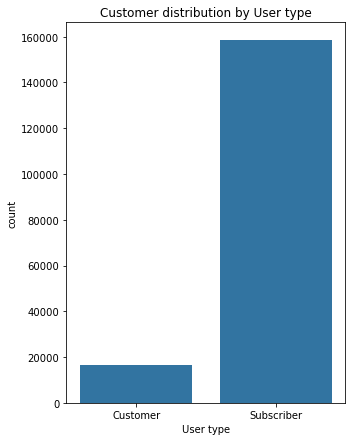

In [3]:
#storing our prefered color palette
color = sb.color_palette()[0]

#bar chart showing usage distribution by user type
plt.figure(figsize = (5, 7))
sb.countplot(data = gobike_clean, x = 'user_type', color = color)
plt.xlabel('User type')
plt.title('Customer distribution by User type')
plt.xticks(rotation = 360);

## Distribution of User Type to Duration 

The violin plot below does a good job to show the duration which go bike users use the system. We can see that customers who are not subscribed to the system mostly use the bikes for under 100 mins. However, on the part of the subscribers to the system, we that they use the bikes for much longer.

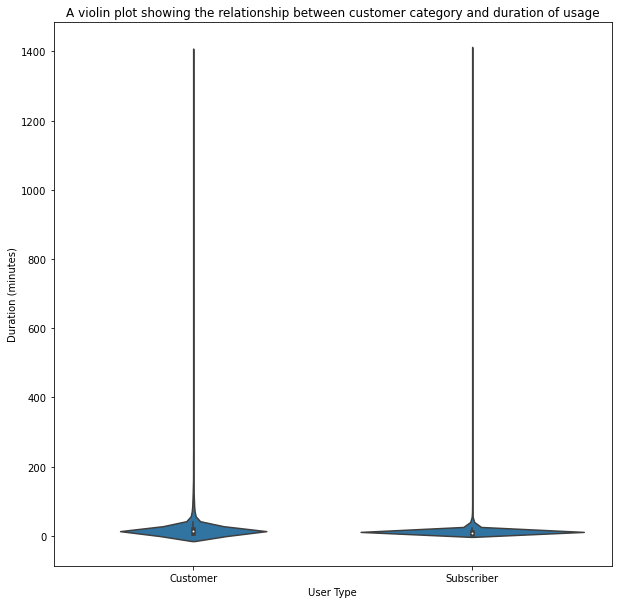

In [4]:
# gender categories
customer_cat = ['Customer', 'Subscriber']

# Returns the types for member_gender with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
customer = pd.api.types.CategoricalDtype(ordered=True, categories=customer_cat)

# Use pandas.astype() to convert the "member_gender" column from a plain object type into an ordered categorical type 
gobike_clean['user_type'] = gobike_clean['user_type'].astype(customer);

#color_palette
base_color = sb.color_palette()[0]

#setting figure size
plt.figure(figsize = (10, 10))

#plotting our graph
sb.violinplot(data = gobike_clean, x = 'user_type', y = 'minutes', color = base_color)
plt.xlabel('User Type')
plt.ylabel('Duration (minutes)')
plt.title('A violin plot showing the relationship between customer category and duration of usage');

Interestingly, looking at the boxplot that follows, we see that there a lot of the subscribers use the bike for much longer when compared to the users who are customers. 

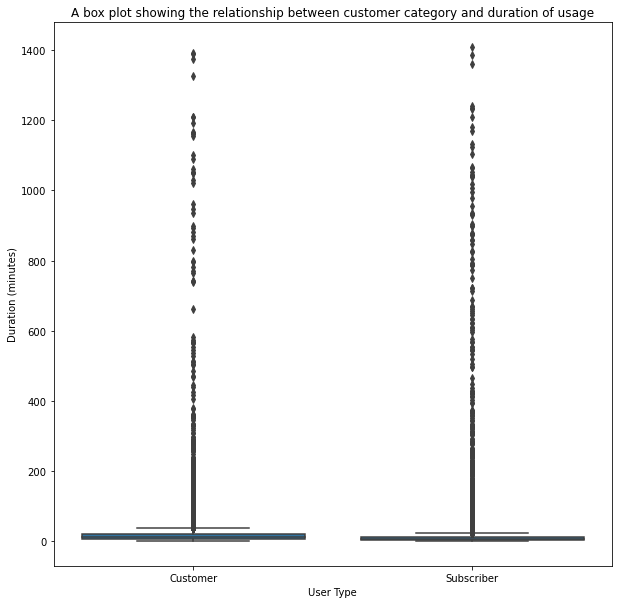

In [5]:
#setting figure size
plt.figure(figsize = (10, 10))

#plotting our graph
sb.boxplot(data = gobike_clean, x = 'user_type', y = 'minutes', color = base_color)
plt.xlabel('User Type')
plt.ylabel('Duration (minutes)')
plt.title('A box plot showing the relationship between customer category and duration of usage');

## Distribution of User Type by Duration & Age

In the scatter plot that follows, we can see the user type distribution plotted against duration (in minutes) and age. This gives us an insight into age of the users and the duration which they use the bikes for. We see which user type use the bike for longer periods.  Interestingly, we can see that the majorilty of those who used the bikes longer are the subscribers to the sytem.

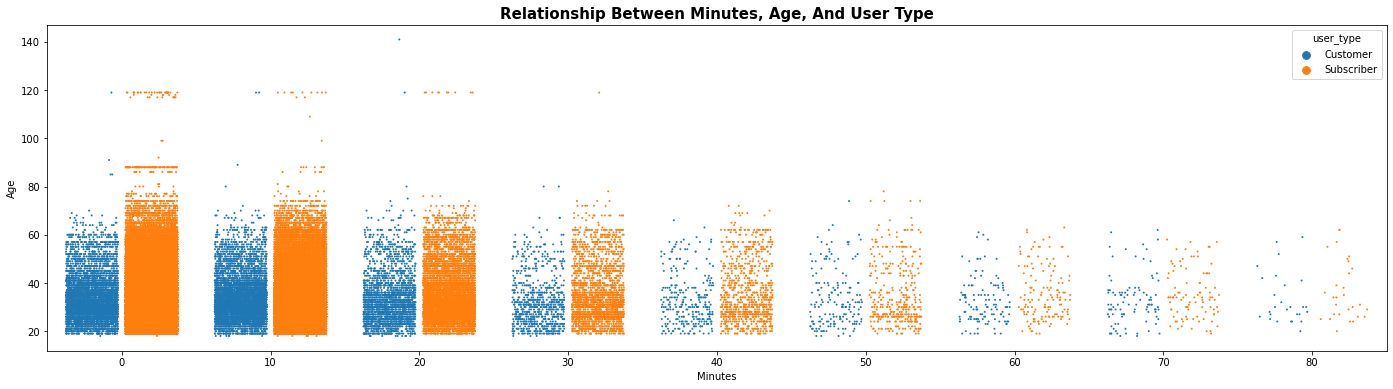

In [6]:
#stripplot showing relationship between age, duration, and user type
plt.figure(figsize = (24, 6))

# create minute 10 minutes intervals using floor division (lowest integer divisor) 
gobike_clean['minutes_int']=((gobike_clean['minutes']//10)*10).astype(int)

sb.stripplot(data = gobike_clean.query('minutes<minutes.quantile(0.995)'), 
		x='minutes_int', y='age', hue='user_type', size=2, jitter=0.35, dodge=True)

plt.xlabel('Minutes')
plt.ylabel('Age')
plt.title('Relationship between minutes, age, and user type'.title(), fontsize=15, fontweight='bold');

In [7]:
!jupyter nbconvert Part_2_Ford_GoBike_System_Data_(Explanation).ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_2_Ford_GoBike_System_Data_(Explanation).ipynb to slides
[NbConvertApp] Writing 846277 bytes to Part_2_Ford_GoBike_System_Data_(Explanation).slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\alami\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\alami\Anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\alami\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alami\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\alami\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self